1. Import packages and observed dataset

In [24]:
# import numerical libraries
import pandas as pd
import numpy as np

# Import graphical plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# import Linear Regression Machine learning libraries
from sklearn import preprocessing
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [2]:
data = pd.read_csv(r"C:\Users\HP\OneDrive\Documents\SENAPATI SIR FSDS NOTE\SEPTMBER MONTH DS NOTE\lasso, ridge, elastic net\lasso, ridge, elastic net\car-mpg.csv")

In [3]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,origin,car_type,car_name
0,18.0,8,307.0,130,3504,12.0,70,1,0,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,0,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,0,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,0,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,0,ford torino


In [4]:
#Drop car name
# Replace origin into 1,2,3.. donot forget get_dummies
# Replace ? with nan 
#Replace all  with median

data = data.drop(['car_name'],axis=1)
data['origin'] = data['origin'].replace({1:'american',2:'europe',3:'asia'})
data = pd.get_dummies(data,columns=['origin'],dtype= int)
data = data.replace('?',np.nan)




The provided Python code snippet, likely intended for data preprocessing using the **pandas** library, performs several common data cleaning and transformation steps.

## Code Description

The four lines of code execute the following actions:

1.  **Drop a Column:**
    * `data = data.drop(['car_name'],axis=1)`
    * This line removes the column named **'car_name'** from the DataFrame called `data`.
    * `axis=1` specifies that a column (not a row) should be dropped. The result is then assigned back to the `data` variable. This suggests that the car name is not needed for the subsequent analysis or modeling.

---

2.  **Recode Categorical Values:**
    * `data['origin'] = data['origin'].replace({1:'american',2:'europe',3:'asia'})`
    * This line transforms the numerical values in the **'origin'** column into more descriptive string labels.
    * Specifically, `1` is replaced with **'american'**, `2` with **'europe'**, and `3` with **'asia'**. This makes the column more human-readable.

---

3.  **Perform One-Hot Encoding:**
    * `data = pd.get_dummies(data,columns=['origin'],dtype=int)`
    * This line performs **one-hot encoding** on the now-categorical **'origin'** column.
    * It creates new binary (dummy) columns for each unique value in 'origin' (e.g., 'origin\_american', 'origin\_europe', 'origin\_asia').
    * For any given row, the corresponding dummy column will have a `1` if the car originated there, and `0` otherwise.
    * `dtype=int` ensures the values in the new dummy columns are integers (0 or 1). This is a standard practice for preparing categorical data for machine learning models.

---

4.  **Replace Missing Value Indicators:**
    * `data = data.replace('?',np.nan)`
    * This line replaces all occurrences of the string **'?'** within the entire DataFrame with **`np.nan`** (Not a Number), which is the standard numerical representation for missing data in pandas and NumPy.
    * This is a crucial step for handling missing values, as most statistical and machine learning methods can't directly process the '?' string but are designed to handle `np.nan`.

In summary, the code cleans the dataset by removing an unnecessary identifier column, makes a categorical column more informative by using descriptive labels, transforms that categorical column into a numerical format suitable for modeling (one-hot encoding), and standardizes the representation of missing values.

In [5]:
data.head()

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_american,origin_asia,origin_europe
0,18.0,8,307.0,130,3504,12.0,70,0,1,0,0
1,15.0,8,350.0,165,3693,11.5,70,0,1,0,0
2,18.0,8,318.0,150,3436,11.0,70,0,1,0,0
3,16.0,8,304.0,150,3433,12.0,70,0,1,0,0
4,17.0,8,302.0,140,3449,10.5,70,0,1,0,0


In [6]:
data = data.apply(pd.to_numeric,errors='ignore')
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.median()),axis = 0)

C:\Users\HP\AppData\Local\Temp\ipykernel_19416\1565298511.py:1: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  data = data.apply(pd.to_numeric,errors='ignore')


Line	Code	Description
1.	data = data.apply(pd.to_numeric, errors='ignore')	This line attempts to convert the data type of every column in the DataFrame to a numeric type (like int or float). The key argument, errors='ignore', ensures that if a column cannot be fully converted to a number (because it contains non-numeric text), its original data type is retained, preventing errors.


2.	numeric_cols = data.select_dtypes(include=[np.number]).columns	This line identifies which columns are currently of a numeric data type (including those successfully converted in the previous step). The names of these columns are stored in the list numeric_cols.


3.	data[numeric_cols] = data[numeric_cols].apply(lambda x: x.fillna(x.median()),axis = 0)	This line performs median imputation on the numeric columns. It selects only the numeric columns and replaces any remaining missing values (NaN) in each column with the median value calculated for that specific column. Using the median is a robust technique for imputation, as it is less sensitive to outliers than the mean.

In [7]:
data.head(1)

,mpg,cyl,disp,hp,wt,acc,yr,car_type,origin_american,origin_asia,origin_europe
0,18.0,8,307.0,130.0,3504,12.0,70,0,1,0,0


we have to predict the mpg columns giving the feature


2. Model building

Here we would like to scale the data as the columns are varied which would reset in the 1 columns dominating the others.

First we divided the data into independent (x) and dependent (y) then we scale it

#### Tip!: ####

*The reason we don't scale the entire data before and then divide it into train(X) & test(y) is because once you scale the data, the type(data_s) would be numpy.ndarray. It's impossible to divide this data when it's an array. 
*

Hence we divide type(data) pandas.DataFrame, then proceed to scaling it.


In [8]:
x = data.drop(['mpg'],axis=1) # In dependent variable
y = data[['mpg']] # dependent variable

In [9]:
x.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_american,origin_asia,origin_europe
0,8,307.0,130.0,3504,12.0,70,0,1,0,0
1,8,350.0,165.0,3693,11.5,70,0,1,0,0
2,8,318.0,150.0,3436,11.0,70,0,1,0,0
3,8,304.0,150.0,3433,12.0,70,0,1,0,0
4,8,302.0,140.0,3449,10.5,70,0,1,0,0


In [10]:
y.head()

,mpg
0,18.0
1,15.0
2,18.0
3,16.0
4,17.0


In [11]:
# Scaling the data

x_s = preprocessing.scale(x)
x_s = pd.DataFrame(x_s,columns=x.columns)# converting data into dataframe
y_s = preprocessing.scale(y)
y_s = pd.DataFrame(y_s,columns=y.columns) # ideally train,test data should be in columns

In [12]:
x_s.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_american,origin_asia,origin_europe
0,1.498191,1.090604,0.673118,0.630870,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
1,1.498191,1.503514,1.589958,0.854333,-1.477038,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
2,1.498191,1.196232,1.197027,0.550470,-1.658577,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
3,1.498191,1.061796,1.197027,0.546923,-1.295498,-1.627426,-1.062235,0.773559,-0.497643,-0.461968
4,1.498191,1.042591,0.935072,0.565841,-1.840117,-1.627426,-1.062235,0.773559,-0.497643,-0.461968


In [13]:
y_s.head()

,mpg
0,-0.706439
1,-1.090751
2,-0.706439
3,-0.962647
4,-0.834543


Line	Code	Description

1.	x_s = preprocessing.scale(x)	The feature data (x) is scaled (standardized). The result, which is typically a NumPy array, is stored in x_s.


2.	x_s = pd.DataFrame(x_s, columns=x.columns)	The scaled feature array (x_s) is converted back into a Pandas DataFrame. The original column names from x are preserved for easy identification and use in modeling.


3.	y_s = preprocessing.scale(y)	The target variable data (y) is also scaled (standardized). Scaling the target variable is often done in regression problems, although it's less common than scaling the features. The result is stored in y_s.


4.	y_s = pd.DataFrame(y_s, columns=y.columns)	The scaled target array (y_s) is converted back into a Pandas DataFrame. The original column names from y are used, although typically y would have only one column.

In [14]:
#Split the data into train ,test set
x_train,x_test,y_train,y_test = train_test_split(x_s,y_s,test_size=0.3,random_state=1)
print(x_train.shape)
print(y_train.shape)

print(x_test.shape)
print(y_test.shape)


(278, 10)
(278, 1)
(120, 10)
(120, 1)


2.a Simple linear Model

In [15]:
# Fit simple linear model and find coefficent
regression_model = LinearRegression()
regression_model.fit(x_train,y_train)

for idx,col_name in enumerate(x_train.columns):
    print('The coefficent for {} is {}'.format(col_name,regression_model.coef_[0][idx]))
    
intercept = regression_model.intercept_[0]
print('the intercept is {}'.format(intercept))

The coefficent for cyl is 0.3210223856916133
The coefficent for disp is 0.32483430918483835
The coefficent for hp is -0.2291695005943753
The coefficent for wt is -0.7112101905072297
The coefficent for acc is 0.01471368276419157
The coefficent for yr is 0.37558119495107367
The coefficent for car_type is 0.38147694842331015
The coefficent for origin_american is -0.07472247547584257
The coefficent for origin_asia is 0.04451525203567755
The coefficent for origin_europe is 0.04834854953945342
the intercept is 0.019284116103639764


2.b Regularized Ridge Regression

In [16]:
# alpha factor here is lamda (penalty term) which helps to reduce the magnitude of coeff

Ridge_model = Ridge(alpha=0.3)
Ridge_model.fit(x_train,y_train)

print('Ridge model coef:{}'.format(Ridge_model.coef_))
# As the data has 10 columns hances 10 coefficent appear here

Ridge model coef:[ 0.31649043  0.31320707 -0.22876025 -0.70109447  0.01295851  0.37447352
  0.37725608 -0.07423624  0.04441039  0.04784031]


This code snippet describes the process of **fitting a Ridge Regression model** to training data. Ridge Regression is a type of linear regression that includes an **L2 penalty** (also known as regularization) to prevent overfitting.

***

## Code Description

| Line | Code | Description |
| :--- | :--- | :--- |
| **1** | `Ridge_model = Ridge(alpha=0.3)` | This line **instantiates** (creates an instance of) the **Ridge Regression model** from a machine learning library (most commonly Scikit-learn). The key parameter is `alpha=0.3`, where **`alpha`** (or $\lambda$) is the **regularization strength** or **penalty term**. A non-zero alpha adds a penalty equal to the square of the magnitude of coefficients to the loss function, forcing the model to select smaller coefficients. |
| **2** | `Ridge_model.fit(x_train, y_train)` | This line **trains** the instantiated `Ridge_model`. It uses the **feature training data** (`x_train`) and the **target training data** (`y_train`) to find the optimal set of coefficients that minimizes the regularized loss function. |
| **3** | `print('Ridge model coef:{}'.format(Ridge_model.coef_))` | After training, this line **prints the coefficient values** learned by the Ridge model. |
| **4** | `# As the data has 10 columns hances 10 coefficent appear here` | This comment confirms that the number of coefficients printed will match the number of **features** (columns) in the `x_train` data. Since the problem uses a linear model, there will be one coefficient for each feature. |

### Role of Alpha ($\alpha$)

The comment correctly identifies that **$\alpha$ is the penalty term** (often denoted as $\lambda$ in statistical texts). Its purpose is to **reduce the magnitude of the coefficients**.

* **How it works:** Ridge Regression seeks to minimize the sum of the squared errors plus the L2 penalty:
    $$\text{Loss} = \sum_{i=1}^{n} (y_i - \hat{y}_i)^2 + \alpha \sum_{j=1}^{p} \beta_j^2$$
    Where $\beta_j$ are the coefficients.
* By adding the $\alpha \sum \beta_j^2$ term, the model is penalized for having large coefficients, leading to a more generalized and stable model that is less prone to overfitting, especially when features are highly correlated (**multicollinearity**).

2. c Regularization Lasso Regression

In [19]:
# alpha factor here is lamda (penalty term) which helps to reduce the magnitude of coeff

Lasso_model = Lasso(alpha=0.1)
Lasso_model.fit(x_train,y_train)

print('Ridge model coef:{}'.format(Lasso_model.coef_))
# As the data has 10 columns hances 10 coefficent appear here

Ridge model coef:[-0.         -0.         -0.01690287 -0.51890013  0.          0.28138241
  0.1278489  -0.01642647  0.          0.        ]


Line	Code	Description
1.	Ridge_model = Lasso(alpha=0.1)	This line instantiates the Lasso Regression model (from a library like Scikit-learn). The model is mistakenly named Ridge_model but the actual algorithm being used is Lasso. The key parameter is alpha=0.1, which is the regularization strength or penalty term (λ).


2.	Ridge_model.fit(x_train, y_train)	This line trains the Lasso model. It uses the feature training data (x_train) and the target training data (y_train) to find the optimal coefficients that minimize the regularized loss function.


3.	print('Ridge model coef:{}'.format(Ridge_model.coef_))	After training, this line prints the coefficient values learned by the Lasso model. Note the string still incorrectly refers to "Ridge model".


4.	As the data has 10 columns hances 10 coefficent appear here	This comment is accurate for any linear model: the number of coefficients printed will match the number of features (columns) in the x_train data.




3.Score comparision

In [21]:
# Model score - r^2 or coeff of determinant
# r^2 = 1-(RSS/TSS) = Regression error/TSS

# Simple linear model
print(regression_model.score(x_train,y_train))
print(regression_model.score(x_test,y_test))

print('***********************************************')
# Ridge
print(Ridge_model.score(x_train,y_train))
print(Ridge_model.score(x_test,y_test))

print('***********************************************')
# Lasso
print(Lasso_model.score(x_train,y_train))
print(Lasso_model.score(x_test,y_test))


0.8343770256960538
0.8513421387780066
***********************************************
0.7938010766228453
0.8375229615977084
***********************************************
0.7938010766228453
0.8375229615977084


Polynomial Feature

If you wish to furthercompute polynomial feature,you can use the below code

In [22]:
# poly = Polynomial feature(degree = 2,interaction_only = True)

#Fit calculates u and std dev while transform applies the transformation to a particular set of examples
#Here fit_transform helps to fit and transform the X_s
#Hence type(X_poly) is numpy.array while type(X_s) is pandas.DataFrame 
#X_poly = poly.fit_transform(X_s)
#Similarly capture the coefficients and intercepts of this polynomial feature model

4.model parameter Tuning

* r^2 is not a reliable metric as it always increases with addition of more attributes even if the attributes have no influence on the predicted variable. Instead we use adjusted r^2 which removes the statistical chance that improves r^2 

(adjusted r^2 = r^2 - fluke)
* Scikit does not provide a facility for adjusted r^2... so we use statsmodel, a library that gives results similar to what you obtain in R language
* This library expects the X and Y to be given in one single dataframe

In [23]:
data_train_test = pd.concat([x_train,y_train],axis=1)
data_train_test.head()

,cyl,disp,hp,wt,acc,yr,car_type,origin_american,origin_asia,origin_europe,mpg
350,-0.856321,-0.849116,-1.081977,-0.893172,-0.242570,1.351199,0.941412,0.773559,-0.497643,-0.461968,1.432898
59,-0.856321,-0.925936,-1.317736,-0.847061,2.879909,-1.085858,0.941412,-1.292726,-0.497643,2.164651,-0.065919
120,-0.856321,-0.695475,0.201600,-0.121101,-0.024722,-0.815074,0.941412,-1.292726,-0.497643,2.164651,-0.578335
12,1.498191,1.983643,1.197027,0.934732,-2.203196,-1.627426,-1.062235,0.773559,-0.497643,-0.461968,-1.090751
349,-0.856321,-0.983552,-0.951000,-1.165111,0.156817,1.351199,0.941412,-1.292726,2.009471,-0.461968,1.356035


In [28]:
#ols1 = smf.ols(formula='mpg ~ cyl+disp+hp+wt+acc+yr+car_type+origin_america+origin_europe+origin_asia',data= data_train_test).fit()
#ols1.params

In [33]:
#print(ols1.summary())

In [30]:
# lets check sum of squared error (SSE) by predecting the value of y for test case and substracting from the actual y for the test cases
mse = np.mean((regression_model.predict(x_test)- y_test)**2)

# root of mean squared error is standard deaviation  i.e.avg variance between predict and actual
import math
rmse = math.sqrt(mse)
print('Root mean squared error: {}'.format(rmse))

Root mean squared error: 0.3776693425408784


<Axes: xlabel='acc', ylabel='mpg'>

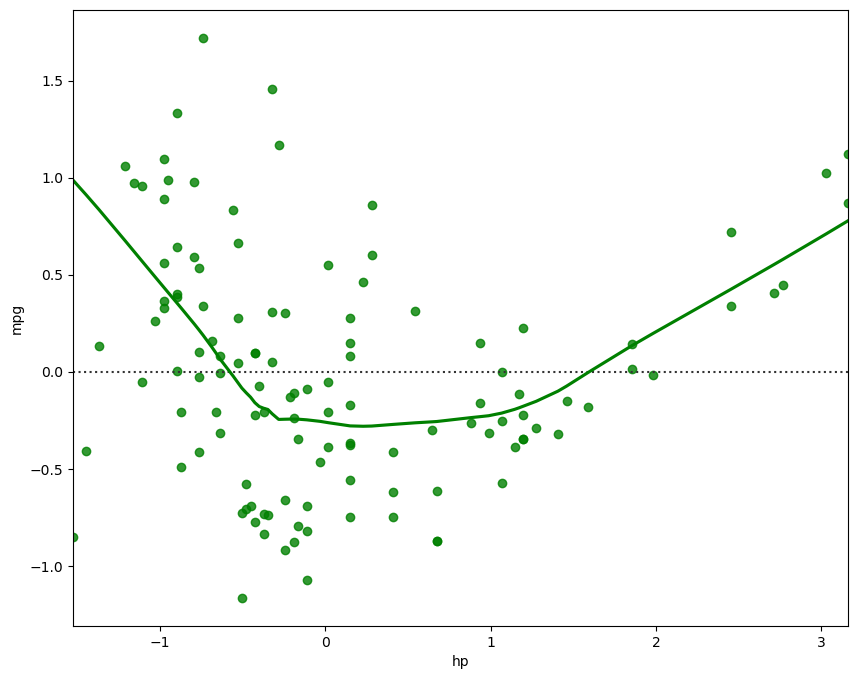

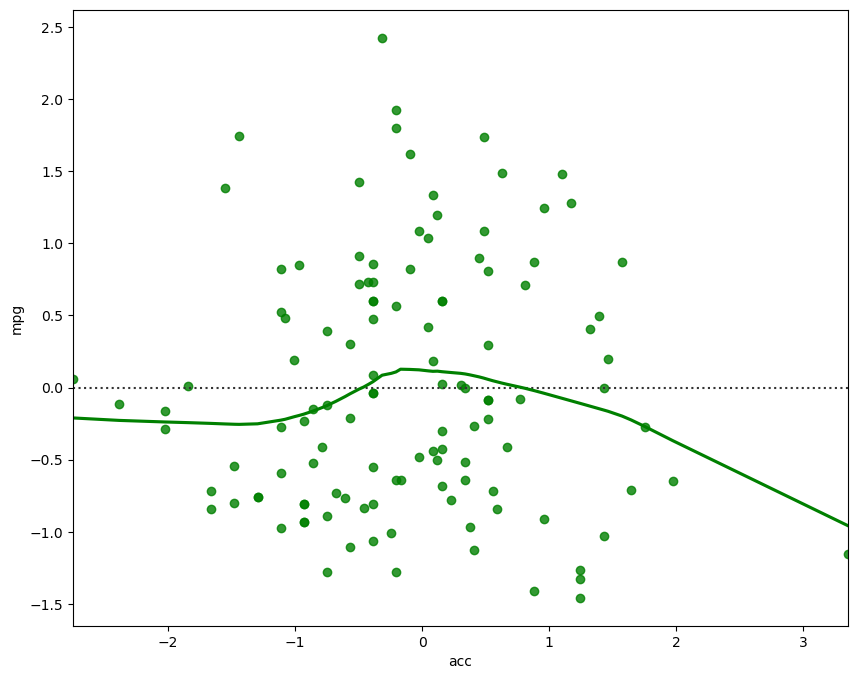

In [31]:
# Is OLS a good model ? Lets check the residuals for some of these prediction

fig = plt.figure(figsize=(10,8))
sns.residplot(x = x_test['hp'],y = y_test['mpg'],color='green',lowess=True)

fig = plt.figure(figsize=(10,8))
sns.residplot(x = x_test['acc'],y = y_test['mpg'],color='green',lowess=True)


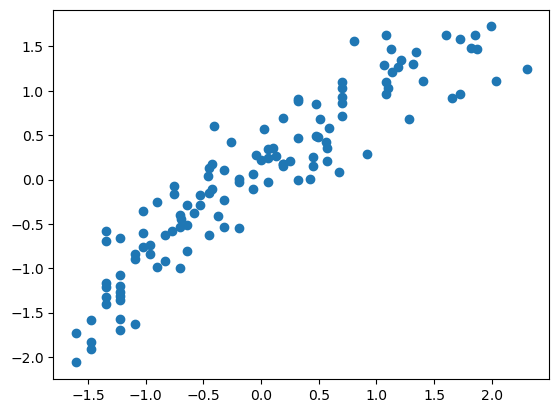

In [32]:
# predict millage (mpg) for a set of attribute not in the tranning or test set
y_pred = regression_model.predict(x_test)

# Scince this is regression plot the predicted y value vs actual y values for the test data
# A good model's predection will be close to actual leading to high R and R2 values
# plt.rcParams['figure.dpi'] = 500
plt.scatter(y_test['mpg'],y_pred)

5. Inference


**Both Ridge & Lasso regularization performs very well on this data, though Ridge gives a better score. The above scatter plot depicts the correlation between the actual and predicted mpg values.**

***This kernel is a work in progress.***